# Azure Cognitive Services and Custom Vision
If you are dealing with a well-defined general ML problem, such as classification, object or face detection in  computer vision, optical character recognition(OCR) and handwritingrecognition, speech-to-text, etc, the chances are that these services have already been implemented and battle-tested in azure. <br>
If your problem space is general-such as detecting and matching faces from a camera image to an ID image- or detecting adult content in user-uploaded media, then you can look into cognitive services. The cognitive services website features demos for almost all the APIs and you can try them<br>
If your domain is very specific but uses one of the previously discussed algorithms, it is likely you can use a custom cognitive service and fine-tune it to your customized domain. This works very well in general for image classification and object detection.

## Azure Cognitive Services
Cognitive services is a collection of APIs for pre-trained ML models divided into 6 categories:
* Vision
* Speech
* Knowledge
* Search
* Language
* Anomaly Detection

Cognitive service models can be consumed using REST API from any programming language. It is most likely more efficient to use the face detection API from azure cognitive services than build a more complete and continuous end-to-end ML pipeline and train the same model from scratch. While it is a lot easier to use the cognitive service API instead, your application requires an internet connection to reach the API. The following is a simple example for calling the cognitive services API for computer vision. We will use the analyze image API to extract categories, tags and description from the image

### Analyze images

In [23]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from msrest.authentication import CognitiveServicesCredentials
from PIL import Image
import requests
from io import StringIO

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [15]:
key = ""
endpoint = ""

computervision_client = ComputerVisionClient(
    endpoint,
    CognitiveServicesCredentials(key)
)


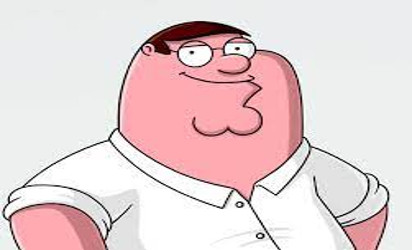

Description:
a cartoon of a person with confidence 52.91% 


In [16]:
# open image file
image_path = 'images/peter_griffin.jpeg'
image = open(image_path, 'rb')

# Display the image
display(Image.open(image_path).resize((412, 250)))

# call the API
description_result = computervision_client.describe_image_in_stream(image)

# Get the description with confidence interval
print('Description:')
if (len(description_result.captions) == 0):
    print('No description detected')
else:
    for caption in description_result.captions:
        print(f"{caption.text} with confidence {caption.confidence * 100:.2f}% ")

In [39]:
# create a function that takes image url and calls the api
def describe_image(image_path):
    image = open(image_path, 'rb')
    # Display the image
    display(Image.open(image_path).resize((412, 250)))
    # call the API
    description_result = computervision_client.describe_image_in_stream(image)
    # Get the description with confidence interval
    print('Description:')
    if (len(description_result.captions) == 0):
        print('No description detected')
    else:
        for caption in description_result.captions:
            print(f"{caption.text} with confidence {caption.confidence * 100:.2f}% ")


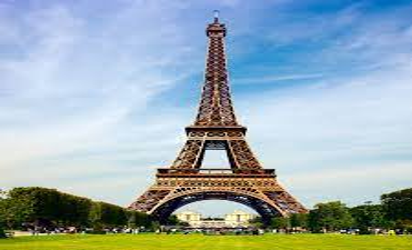

Description:
a tall metal tower with Eiffel Tower in the background with confidence 42.08% 


In [27]:
describe_image('images/eiffel_tower.jpeg')

### Tag visual feature
Computer vision service's algorithms process images and returns tags based on objects (scuch as, furniture, tools, etc), living beings, scenery, and actions

In [36]:
# create a function that takes image url and calls the api
def tag_image(image_path):
    image = open(image_path, 'rb')
    # Display the image
    display(Image.open(image_path).resize((412, 250)))
    # call the API
    tags_result = computervision_client.tag_image_in_stream(image)
    # Get the description with confidence interval
    print('Tags:')
    if (len(tags_result.tags) == 0):
        print('No tags detected')
    else:
        for tag in tags_result.tags:
            print(f"{tag.name} with confidence {tag.confidence * 100:.2f}% ")


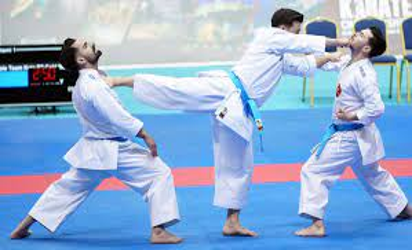

Tags:
sport with confidence 99.50% 
person with confidence 99.08% 
martial arts uniform with confidence 94.30% 
martial arts with confidence 93.57% 
clothing with confidence 92.51% 
contact sport with confidence 92.46% 
japanese martial arts with confidence 92.36% 
combat sport with confidence 92.17% 
striking combat sports with confidence 90.33% 
kung fu with confidence 88.86% 
karate with confidence 86.81% 
taekwondo with confidence 85.55% 
black belt with confidence 84.82% 
judo with confidence 84.37% 
boxing with confidence 61.89% 


In [37]:
tag_image('images/karate.jpeg')

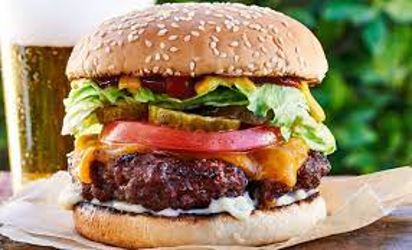

Description:
a burger with lettuce tomato and cheese with confidence 47.94% 


In [41]:
describe_image('images/burger1.jpeg')

### Categorize images

In [43]:
# create a function that takes image url and calls the api
def categorize_image(image_path):
    image = open(image_path, 'rb')
    # Display the image
    display(Image.open(image_path).resize((412, 250)))
    # call the API
    categorize_result = computervision_client.analyze_image_in_stream(image)
    # Get the categories with confidence interval
    print('Categories:')
    if (len(categorize_result.categories) == 0):
        print('No categories detected')
    else:
        for category in categorize_result.categories:
            print(f"{category.name}: {category.score * 100:.2f}% ")


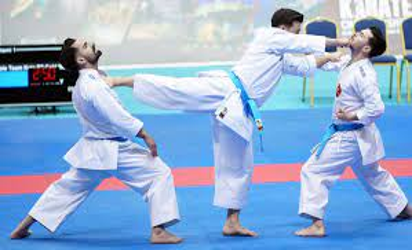

Categories:
outdoor_: 0.78% 
people_swimming: 66.41% 


In [44]:
categorize_image('images/karate.jpeg')

### Detect Faces

In [49]:
def detect_faces(image_path):
    image  = open(image_path, 'rb')
    img = Image.open(image_path)

    # Select visual features you want
    img_features= ['faces']

    # Call the API
    faces_result = computervision_client.analyze_image_in_stream(
        image,
        img_features
    )
    # create figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)

    print('Faces:')
    if (len(faces_result.faces) == 0):
        print('No faces detected')
    else:
        for face in faces_result.faces:
            # craete a rectangle patch
            rect = patches.Rectangle(
                (face.face_rectangle.left, face.face_rectangle.top),
                face.face_rectangle.width,
                face.face_rectangle.height,
                linewidth=2,
                edgecolor='r',
                facecolor='none')

            ax.add_patch(rect)

    plt.show()

Faces:


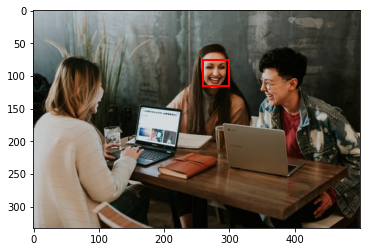

In [50]:
detect_faces('images/students3.jpg')

## Custom Vision - customizing the cognitive services API
Mny developers find cognitive services pretty useful but limited in terms of the application domain. Here are two examples of this limitation
* For a plastics manufacturer, the class labels offered by the object detection API doesn't cover all of their product categories
* For a service dealing with transcribing medical records, many of the medical terms are not recognized or are transcried incorrectly

You can customize an increasing amount of ML services in Azure. The following are examples:
* Custom vision (classification and object detection)
* Customizable speech recognition and transcription
* Customizable voices for text-to-speech
* Customizable translation
* Custom intent and entity recognition in text


